In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astroquery.mpc import MPC

import rebound

def to_radians(value):
    if value==None:
        return 0
    return (value*u.deg).to(u.rad).value

Using the JPL HORIZONS System https://ssd.jpl.nasa.gov/?horizons

In [2]:
sim = rebound.Simulation()

sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('Earth')
sim.add('Mars')

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Target body name: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Target body name: Mars Barycenter (4).


<Figure size 432x288 with 0 Axes>

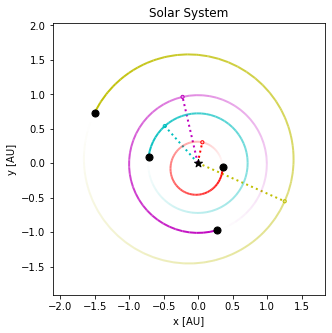

In [3]:
plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', periastron=True, color=True, lw=2)
plt.title('Solar System')
plt.show()

In [4]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

In [5]:
sim.add('Sun')

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).


In [6]:
asteroid_names = ['Ceres', 'Vesta', 'Pallas', 'Hygiea']

for asteroid_name in asteroid_names:
  result = MPC.query_object('asteroid', name=asteroid_name)
  asteroid_data = result[0]
    
#   P = float(asteroid_data['period']) or 0
  semi_major_axis = float(asteroid_data['semimajor_axis'] )or 0
  argument_of_periapsis = to_radians(float(asteroid_data['argument_of_perihelion'])) or 0
  longitude_of_ascending_node = to_radians(float(asteroid_data['ascending_node'])) or 0
  eccentricity = float(asteroid_data['eccentricity']) or 0
  mean_anomaly = float(asteroid_data['mean_anomaly']) or 0
  inclination = to_radians(float(asteroid_data['inclination'])) or 0

  sim.add(a=semi_major_axis, e=eccentricity, omega=argument_of_periapsis, Omega=longitude_of_ascending_node, inc=inclination, M=mean_anomaly)

<Figure size 432x288 with 0 Axes>

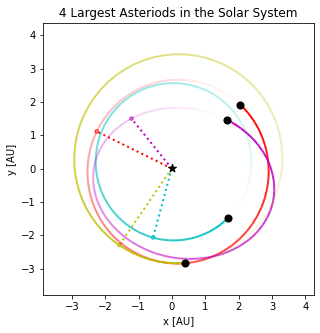

In [7]:
plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", periastron=True, color=True, lw=2)
plt.title('4 Largest Asteriods in the Solar System')
plt.show()